## need to have two matrices - Y and R
- Y is the matrice of movies x users where 
- each column represents a particular user's ratings for each movie and 
- each row represents each user's rating for a particular movie (if not rated, then the rating will be zero)

- R is the matrix indicating whether or not a user has rated a particular movie, should be the same size as Y. Element =0 if user hasnt rated that movie, = 1 otherwise
- This is illustrated in the image below - user 1 (first column) has voted for movies 1 and 2, hence first 2 rows of column 1 of R are equal to 1 
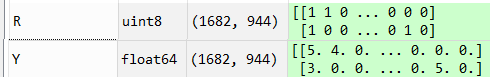

## movie list - list of movies (sorted by alphabetical order) scraped by the RPA process
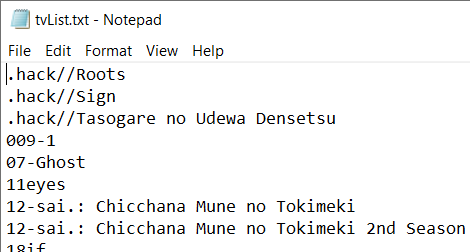

In [145]:
tvListPath = "../RPA/TVList/tvList.txt"
print(tvListPath)
movies = []
with open(tvListPath, encoding='utf-8') as f:
    for line in f:
        movies.append(line[1:])
movies[:10]

../RPA/TVList/tvList.txt


['hack//Roots\n',
 'hack//Sign\n',
 'hack//Tasogare no Udewa Densetsu\n',
 '09-1\n',
 '7-Ghost\n',
 '1eyes\n',
 '2-sai.: Chicchana Mune no Tokimeki\n',
 '2-sai.: Chicchana Mune no Tokimeki 2nd Season\n',
 '8if\n',
 '2/7\n']

## Creating matrices Y and R

will use "Ratings" folder that is populated by the RPA part of this project, 

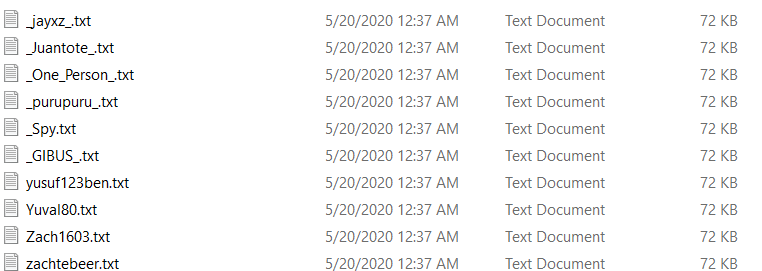

where each file in this folder represents a particular user's rating of each movie in the movie list (if user hasnt rated a movie, the rating column will show a "-". 


- each file is a txt file consiting of 2 columns (Name of anime and Ratings)
- for example in the image below, the user has not seen ".hack//Tasogare no Udewa Densetsu," and "07-Ghost" so the rating column shows a "-"
- Note that each file is also sorted so that the first column is exactly the same as the movies list
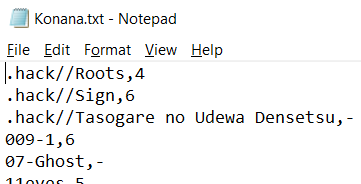


In [89]:
import os
directory = r'..\RPA\Ratings'
for filename in os.listdir(directory):
    print(os.path.join(directory, filename))

..\RPA\Ratings\-Hyun.txt
..\RPA\Ratings\1dufresj.txt
..\RPA\Ratings\1_21gigawatts.txt
..\RPA\Ratings\2Dumb2Watch.txt
..\RPA\Ratings\3Tsenior.txt
..\RPA\Ratings\8daniel7.txt
..\RPA\Ratings\907jv.txt
..\RPA\Ratings\aapfu.txt
..\RPA\Ratings\abseachu.txt
..\RPA\Ratings\Aiwass_97.txt
..\RPA\Ratings\AkaneMusiatowicz.txt
..\RPA\Ratings\akbbarz28.txt
..\RPA\Ratings\Akotronova.txt
..\RPA\Ratings\AK_G.txt
..\RPA\Ratings\Al24.txt
..\RPA\Ratings\AlexWorth.txt
..\RPA\Ratings\alikerame07.txt
..\RPA\Ratings\AlluKK.txt
..\RPA\Ratings\All_Mighto.txt
..\RPA\Ratings\AlMal.txt
..\RPA\Ratings\alon12131415.txt
..\RPA\Ratings\aloni1999.txt
..\RPA\Ratings\Amako01.txt
..\RPA\Ratings\Amamun.txt
..\RPA\Ratings\Ama_depirro.txt
..\RPA\Ratings\AmphiPoke.txt
..\RPA\Ratings\Andre_Alencar.txt
..\RPA\Ratings\angelara22.txt
..\RPA\Ratings\Angelo_D.txt
..\RPA\Ratings\Angelsg96.txt
..\RPA\Ratings\Aniki02.txt
..\RPA\Ratings\animecinico.txt
..\RPA\Ratings\animegirl1346.txt
..\RPA\Ratings\animehentaigod.txt
..\RPA\Ratings\an

### Creating the Y matrix
- we can combine the second column (ratings column) of each file side by side to create the Y matrix
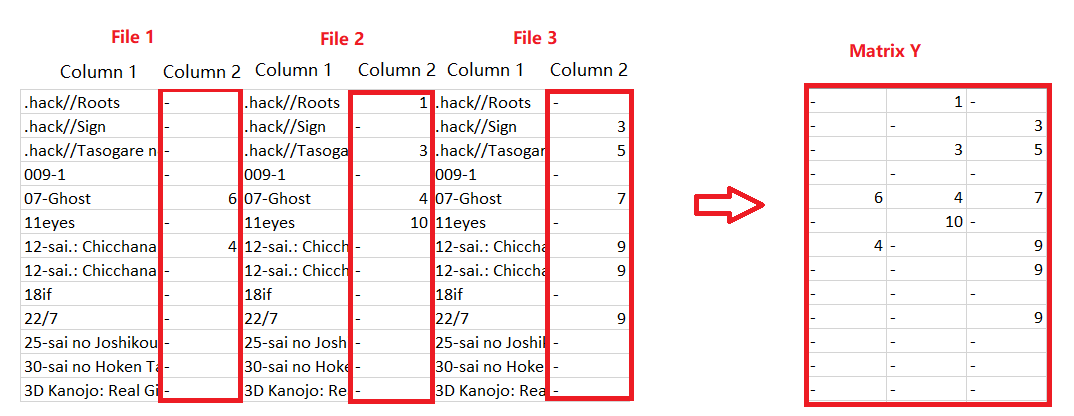

In [15]:
import numpy as np
import pandas as pd

In [90]:
#read txt to dataframe
df = pd.read_csv("..\RPA\Ratings\Konana.txt",header=None)
df.head()

,0,1
0,.hack//Roots,4
1,.hack//Sign,6
2,.hack//Tasogare no Udewa Densetsu,-
3,009-1,6
4,07-Ghost,-


In [91]:
#drop name column , just need the ratings...
df.drop([0], inplace=True, axis=1)
#replace - with 0 (wont have conflict with existing ratings since 1 is the lowest rating so 0 means no rating is given...)
df.replace("-","0",inplace=True)
df.head()

,1
0,4
1,6
2,0
3,6
4,0


In [92]:
#try with second file
df2 = pd.read_csv("..\RPA\Ratings\Zoom009.txt",header=None)
df2.head()

,0,1
0,.hack//Roots,-
1,.hack//Sign,-
2,.hack//Tasogare no Udewa Densetsu,-
3,009-1,-
4,07-Ghost,-


In [93]:
#drop name column , just need the ratings...
df2.drop([0], inplace=True, axis=1)
#replace - with 0 (wont have conflict with existing ratings since 1 is the lowest rating so 0 means no rating is given...)
df2.replace("-","0",inplace=True)
df2.head()

,1
0,0
1,0
2,0
3,0
4,0


In [94]:
dfCombine = pd.concat([df,df2], axis=1)
dfCombine.head()

,1,1
0,4,0
1,6,0
2,0,0
3,6,0
4,0,0


## above example shows combining two files into the "Y" matrix, now we will apply it to the whole folder

In [107]:
def fileToDF(fPath):
    df = pd.read_csv(fPath,header=None)
    #drop name column , just need the ratings...
    df.drop([0], inplace=True, axis=1)
    #replace - with 0 (wont have conflict with existing ratings since 1 is the lowest rating so 0 means no rating is given...)
    df.replace("-","0",inplace=True)
    df = df.apply(pd.to_numeric)
    return df

In [108]:
dft1 = fileToDF("..\RPA\Ratings\-Hyun.txt")
dft1.head()

,1
0,0
1,0
2,0
3,0
4,0


In [217]:
directory = r'..\RPA\Ratings'
dfMatrixY = None
for filename in os.listdir(directory):
    filePath = os.path.join(directory, filename)
    #print(filePath)
    
    dfTmp = fileToDF(filePath)
    dfMatrixY = pd.concat([dfMatrixY,dfTmp], axis=1)
dfMatrixY.head()

,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,6,0,0,0,0,0,0,...,7,0,0,0,0,0,0,0,0,0


### matrixY's dimensions should be (number of movies) x (number of users)

In [178]:
dfMatrixY.shape

(2896, 637)

### convert dataframe into np.array

In [234]:
Y = dfMatrixY.values
Y.shape

5

# Creating the R matrix

In [218]:
def tmp(x):
    if x == 0:
        return 0
    else:
        return 1
dfMatrixR = dfMatrixY.applymap(tmp)
dfMatrixR.head()

,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [181]:
dfMatrixR.shape

(2896, 637)

In [182]:
dfMatrixR.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### convert dataframe into np.array

In [219]:
R = dfMatrixR.values
R.shape

(2896, 637)

# adding my own ratings

In [220]:
dfTmp = fileToDF("MyRatings.txt")
dfTmp.shape
myRatingsArray = dfTmp.values
myRatingsArray.shape

(2896, 1)

In [221]:
myRatingsArray[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [222]:
myRArray = myRatingsArray > 0

In [223]:
Y2 = np.hstack((Y,myRatingsArray))
R2 = np.hstack((R,myRArray))

In [224]:
Y2.shape

(2896, 638)

In [225]:
R2.shape

(2896, 638)

In [226]:
#nm = movie count
#nu = user count
nm, nu = Y2.shape

### Initialize (randomly) X and theta vectors (Will train each using collaborative filtering)

In [227]:
#assume number of features for each movie = 10
nf = 10

In [228]:
X = np.random.rand(nm,nf)
Theta = np.random.rand(nu,nf)

In [229]:
R2[:,-1].shape

(2896,)

In [230]:
def normalizeRatings(myY, myR):
    # The mean is only counting movies that were rated
    Ymean = np.sum(myY,axis=1)/np.sum(myR,axis=1)
    Ymean = Ymean.reshape((Ymean.shape[0],1))
    
    return myY-Ymean, Ymean

In [231]:
Ynorm, Ymean = normalizeRatings(Y2,R2)

C:\Users\jackc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [239]:
Ynorm

array([[-4.33333333, -4.33333333, -4.33333333, ..., -4.33333333,
        -4.33333333, -4.33333333],
       [-6.        , -6.        , -6.        , ..., -6.        ,
        -6.        , -6.        ],
       [-6.4       , -6.4       , -6.4       , ..., -6.4       ,
        -6.4       , -6.4       ],
       ...,
       [-7.6       , -7.6       , -7.6       , ..., -7.6       ,
        -7.6       , -7.6       ],
       [-7.        , -7.        ,  0.        , ..., -7.        ,
        -7.        , -7.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

### Collaborative filtering

In [132]:
def costFunction(x,theta,y,r,regLambda=0): 
    hypo = np.dot(x,theta.T)
    #Then element-wise multiply that matrix by the R matrix
    # so only terms from movies which that user rated are counted in the cost
    #i.e. ignore movies which said user didnt rate
    hypo = np.multiply(hypo,r)
    error = hypo-y
    cost = np.square(error)
    cost = np.sum(cost)
    cost = (1/2) * cost
    
    # Regularization stuff
    cost += (regLambda/2.) * np.sum(np.square(theta))
    
    cost += (regLambda/2.) * np.sum(np.square(x))
    return cost;

def hypoPredictAll(x,theta,r):
    h = np.dot(x,theta.T)
    return h

def hypo(x,theta,r):
    h = np.dot(x,theta.T)
    return np.multiply(h,r)

def gradient(x,theta,y,r,regLambda=0): 
    h = hypo(x,theta,r)
    error = h - y
    
    thetaGrad = error.T.dot(x)
    xGrad = error.dot(theta)
    
    thetaGrad = thetaGrad + regLambda*theta
    xGrad = xGrad + regLambda*x
    
    return thetaGrad,xGrad

def fit(x,theta,y,r,regLambda = 0):
    cost = 0
    updatedTheta = theta
    updatedX = x
    for i in range(20000):
        thetaGrad,xGrad = gradient(updatedX,updatedTheta,y,r,regLambda)
        #print(thetaGrad[0][0])
        #print(xGrad[0][0])
        updatedTheta = updatedTheta - 0.0006*thetaGrad
        updatedX = updatedX - 0.0006*xGrad
        if(i%100==0):
            cost = costFunction(updatedX,updatedTheta,y,r,regLambda)
            print(cost)
    return cost,updatedX,updatedTheta

In [133]:
newCost,newX,newTheta = fit(X,Theta,Y,R,1.5)

326551.1918826999
233027.80363689683
147822.43811357432
117422.20628789019
102249.66295795635
93611.478317661
88218.32116179877
84603.83976624897
82051.99269749588
80180.5730361472
78767.9075028406
77675.9514018584
76813.9750899589
76120.1412981989
75551.30416067125
75076.86217557685
74674.81605379649
74329.14571727581
74028.03293540087
73762.6468226454
73526.30828855216
73313.90881359554
73121.49938723516
72945.99434138049
72784.95471066317
72636.42848435773
72498.83270173953
72370.86670649474
72251.44849630144
72139.66791027303
72034.75184991892
71936.03798069789
71842.95441489111
71755.00370217388
71671.7500444406
71592.80903327322
71517.83943176169
71446.5366420073
71378.62756186243
71313.86657093649
71252.0324139703
71192.92577628256
71136.36737246507
71082.19639531343
71030.26919674306
70980.45809643944
70932.65023780194
70886.74643465708
70842.65997580462
70800.3153765247
70759.6470850463
70720.59816601971
70683.11899114434
70647.16596905341
70612.70034306071
70579.68707794313
7

In [134]:
prediction_matrix = newX.dot(newTheta.T)

In [149]:
Ymean

array([[4.33333333],
       [6.        ],
       [6.4       ],
       ...,
       [7.6       ],
       [7.        ],
       [       nan]])

In [135]:
my_predictions = prediction_matrix[:,-1] + Ymean.flatten()

In [136]:
pred_idxs_sorted = np.argsort(my_predictions)
pred_idxs_sorted[:] = pred_idxs_sorted[::-1]

In [147]:
print ("Top recommendations for you:")
for i in range(10):
    print ('Predicting rating %0.1f for movie %s.' %(my_predictions[pred_idxs_sorted[i]],movies[pred_idxs_sorted[i]]))
    
print ("\nOriginal ratings provided:")
for i in range(len(myRatingsArray)):
    if myRatingsArray[i] > 0:
        print ('Rated %d for movie %s.' %(myRatingsArray[i],movies[i]))

Top recommendations for you:
Predicting rating nan for movie one of the Enders: Dolores I
.
Predicting rating nan for movie ad Guard
.
Predicting rating nan for movie RISON SCHOOL
.
Predicting rating nan for movie roject ARMS
.
Predicting rating nan for movie ucca 2
.
Predicting rating nan for movie uchi Pri*Yucie
.
Predicting rating nan for movie uanzhi Gaoshou
.
Predicting rating nan for movie uanzhi Gaoshou Specials
.
Predicting rating nan for movie uture GPX Cyber Formula
.
Predicting rating nan for movie uture Card Shin Buddyfight
.

Original ratings provided:
Rated 4 for movie eath Note
.
Rated 8 for movie oradora!
.
Rated 7 for movie ORADORA!
.
Rated 9 for movie hite Album
.
Rated 9 for movie hite Album 2
.
Rated 9 for movie hite Album 2nd Season
.
Rated 8 for movie ero no Tsukaima
.
Rated 8 for movie ERO NO TSUKAIMA
.
